In [1]:
#!pip install lightgbm

In [2]:
# Data handling and processing
import pandas as pd
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

In [3]:
#Loading Data set
df = pd.read_csv("C:/Users/nairs/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

## EDA

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [9]:
temp_sum = df.describe().T.round(2)
temp_sum

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [10]:
# Calculate the variance and COV
temp_sum['COV'] = temp_sum['std'] *100/temp_sum['mean']
temp_sum['COV']

Time       50.085663
V1               inf
V2               inf
V3              -inf
V4               inf
V5               inf
V6               inf
V7              -inf
V8               inf
V9              -inf
V10              inf
V11              inf
V12             -inf
V13              inf
V14              inf
V15              inf
V16              inf
V17             -inf
V18              inf
V19              inf
V20              inf
V21              inf
V22             -inf
V23              inf
V24              inf
V25              inf
V26              inf
V27             -inf
V28             -inf
Amount    283.101302
Class            inf
Name: COV, dtype: float64

In [11]:
temp_sum['Med-to-meam'] = round(temp_sum['50%']/temp_sum['mean'],2)

In [12]:
temp_sum

,count,mean,std,min,25%,50%,75%,max,COV,Med-to-meam
Time,284807.0,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00,50.085663,0.89
V1,284807.0,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45,inf,inf
V2,284807.0,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06,inf,inf
V3,284807.0,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38,-inf,-inf
V4,284807.0,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88,inf,-inf
V5,284807.0,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80,inf,-inf
V6,284807.0,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30,inf,-inf
V7,284807.0,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59,-inf,-inf
V8,284807.0,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01,inf,inf
V9,284807.0,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59,-inf,inf


In [13]:
#Creating a copy of main data
temp_data = df.copy()

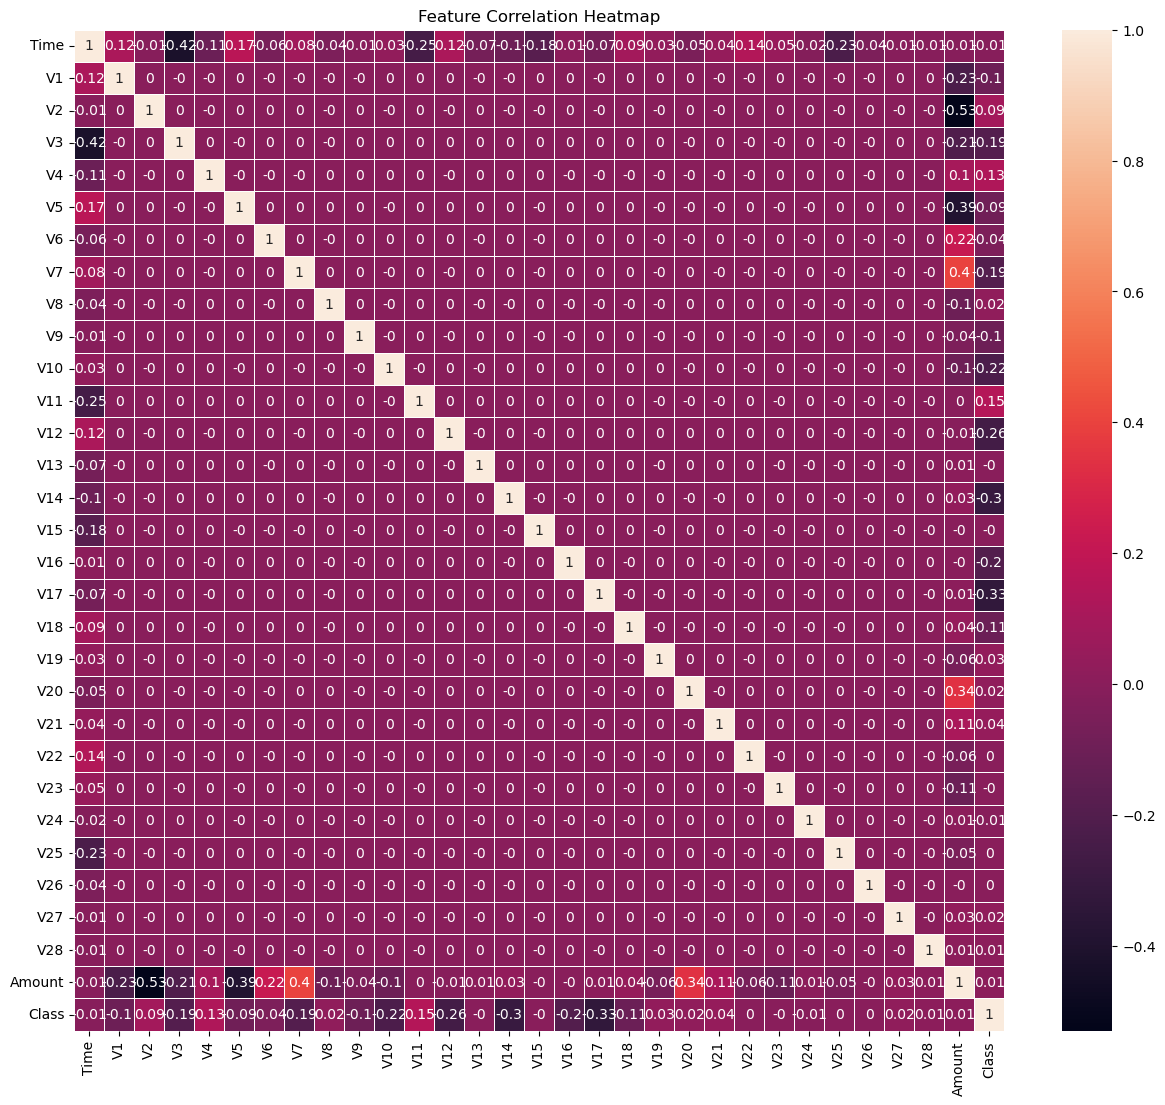

In [14]:
#Heatmap to see the co-relation among the values

plt.figure(figsize=(15, 13))
sns.heatmap(round(temp_data.corr(),2), annot=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

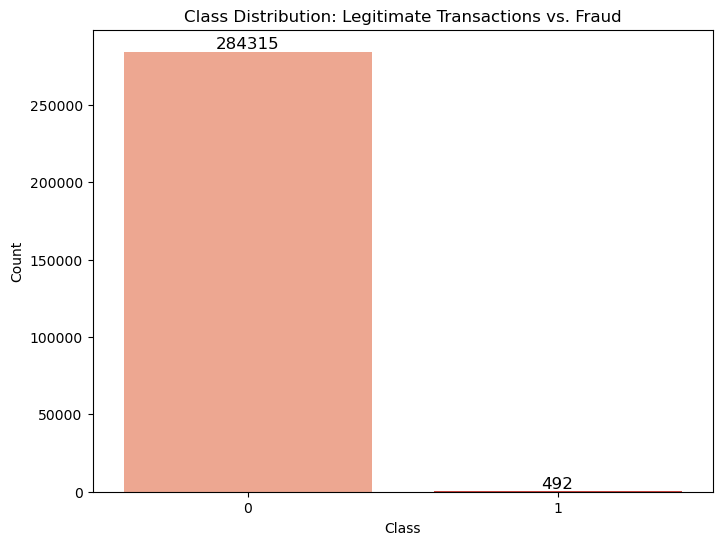

In [15]:
# Figure size
plt.figure(figsize=(8, 6))

# Bar plot with counts on bars and different colors
ax = sns.countplot(data=temp_data, x='Class', palette='Reds')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution: Legitimate Transactions vs. Fraud')

# Annotate each bar with its respective count
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',  # Text to show
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position of text
                ha='center', va='bottom',  # Center text on the bar
                fontsize=12, color='black')  # Text properties

# Display the plot
plt.show()

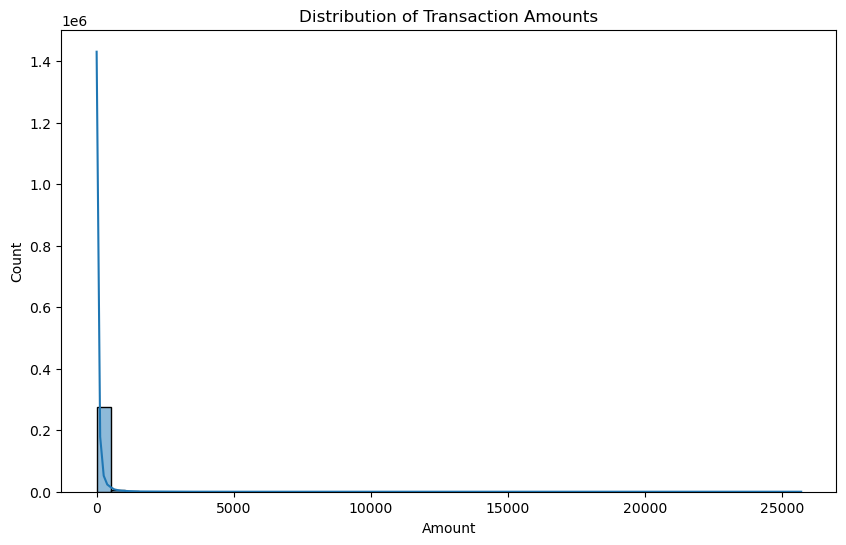

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(temp_data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.show()

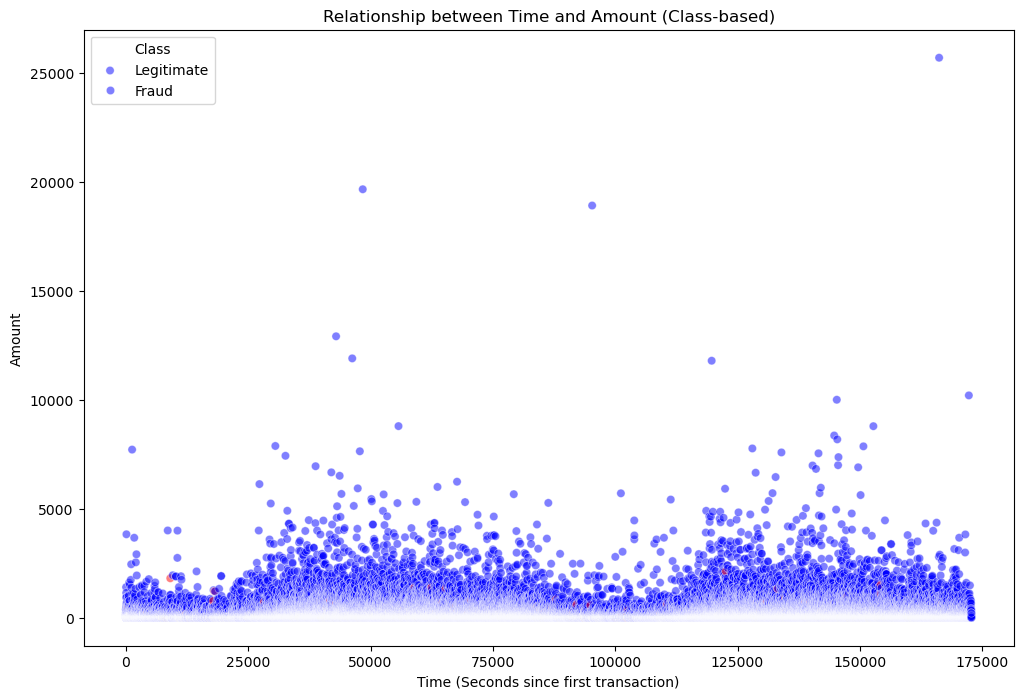

In [17]:
#To know the distribution between Time and Amount
plt.figure(figsize=(12, 8))

# Scatter plot with hue based on Class
sns.scatterplot(data=temp_data, x='Time', y='Amount', hue='Class', palette=['blue', 'red'], alpha=0.5)

plt.title('Relationship between Time and Amount (Class-based)')
plt.xlabel('Time (Seconds since first transaction)')
plt.ylabel('Amount')
plt.legend(title='Class', labels=['Legitimate', 'Fraud'])
plt.show()

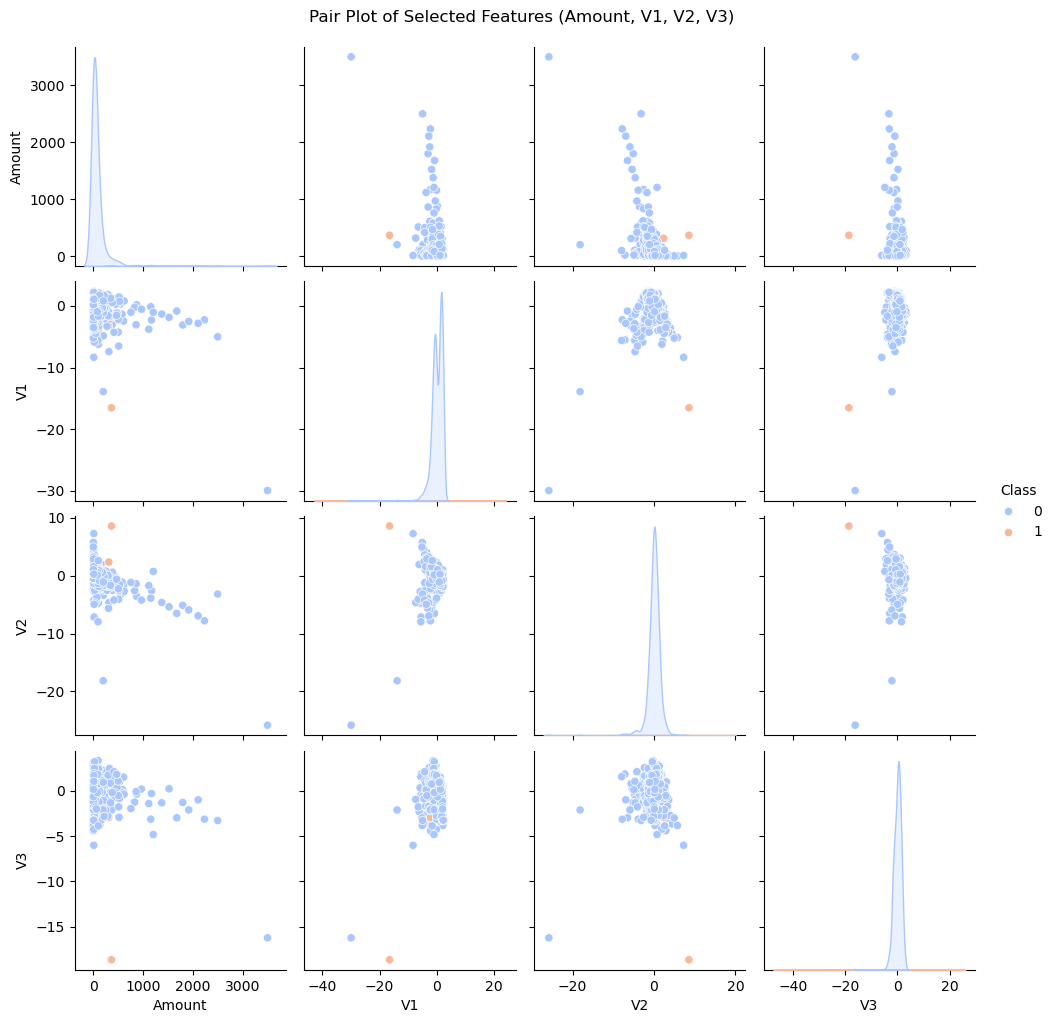

In [18]:
sample_data = temp_data.sample(1000, random_state=42)  # Randomly sample 1000 data points

# Pair plot with selected features
sns.pairplot(sample_data, vars=['Amount', 'V1', 'V2', 'V3'], hue='Class', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Features (Amount, V1, V2, V3)', y=1.02)
plt.show()

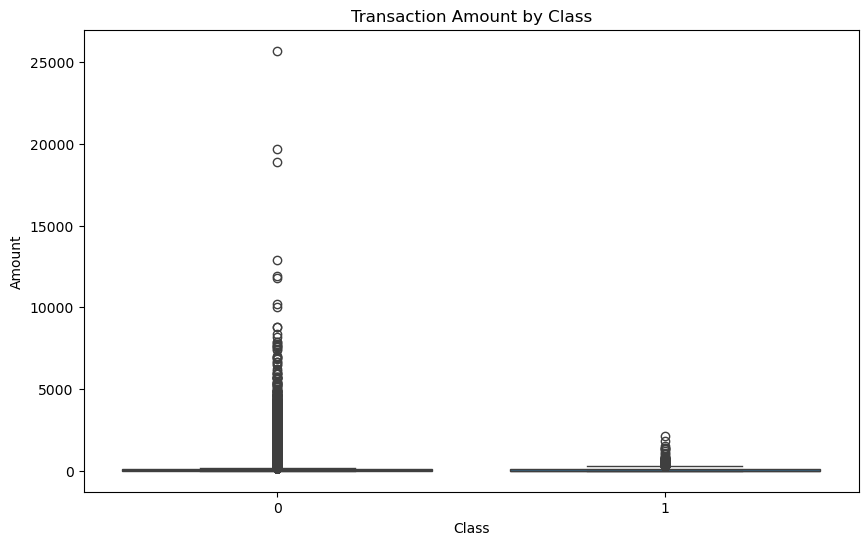

In [19]:
# Visualizing the distribution of the Amount feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=temp_data)
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

In [20]:
#Scaling the feature as the data is imbalanced in class as the no of fradulent cases is less compared to the on that is not
# Separate features and target variable
# Apply RobustScaler on Amount
scaler_amount = RobustScaler()
temp_data['Amount_scaled'] = scaler_amount.fit_transform(temp_data[['Amount']])

# Drop the original Amount column
temp_data.drop(columns=['Amount'])


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.296653
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,0.038986
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,0.641096
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.167680


### Step 5: Apply SMOTE for Class Balancing
### Separate features and target, and apply SMOTE after scaling.

In [21]:
X = temp_data.drop(columns=['Class', 'Time'])  # Exclude target and Time
y = temp_data['Class']

# Split data before SMOTE to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Step 6: Model Training and Evaluation

In [22]:
from sklearn.metrics import accuracy_score
# Define models
log_reg = LogisticRegression(random_state=2)
rf = RandomForestClassifier(random_state=2)
dt = DecisionTreeClassifier(random_state=2)

# Train models
log_reg.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)
dt.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=2)

In [23]:
# Predictions and accuracy on train data
y_pred_log_train = log_reg.predict(X_train)
y_pred_rf_train = rf.predict(X_train)
y_pred_dt_train = dt.predict(X_train)

# Print accuracy for each model on train data
print(f'Logistic Regression Train Accuracy: {accuracy_score(y_train, y_pred_log_train):.4f}')
print(f'Random Forest Train Accuracy: {accuracy_score(y_train, y_pred_rf_train):.4f}')
print(f'Decision Tree Train Accuracy: {accuracy_score(y_train, y_pred_dt_train):.4f}')

Logistic Regression Train Accuracy: 0.9814
Random Forest Train Accuracy: 1.0000
Decision Tree Train Accuracy: 1.0000


In [24]:
from sklearn.metrics import accuracy_score

# Prediction and accuracy on test data
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_dt = dt.predict(X_test)

# Print accuracy for each model
print(f'Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.4f}')
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}')
print(f'Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}')

Logistic Regression Accuracy: 0.9808
Random Forest Accuracy: 0.9995
Decision Tree Accuracy: 0.9978


from sklearn.model_selection import GridSearchCV

# Define the models and their respective parameter grids
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],          # Regularization strength
            'solver': ['liblinear', 'saga']        # Solver options
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],       # Number of trees in the forest
            'max_depth': [None, 10, 20, 30],      # Maximum depth of the tree
            'min_samples_split': [2, 5, 10]       # Minimum samples required to split a node
        }
    },
    'Support Vector Machine': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10, 100],               # Regularization parameter
            'kernel': ['linear', 'rbf'],          # Kernel options
            'gamma': ['scale', 'auto']            # Kernel coefficient
        }
    }
}

# Dictionary to store the best model and parameters for each algorithm
best_models = {}

# Loop through each model and its parameter grid
for model_name, config in param_grids.items():
    print(f"\nPerforming Grid Search for {model_name}...\n")
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_smote, y_train_smote)  # Fit on the SMOTE-balanced training data
    
    # Print best parameters and best score
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Score for {model_name}: {grid_search.best_score_:.4f}")
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_

# Check the best models dictionary to review each model's optimal configuration
best_models


Logistic Regression - Train Data


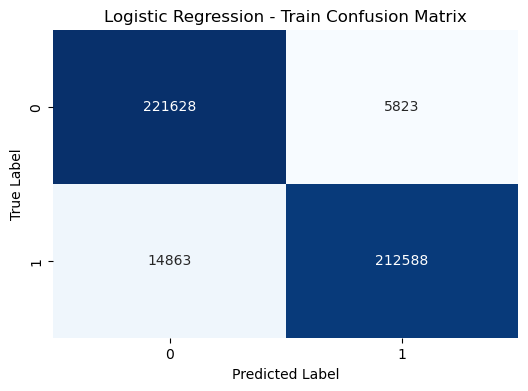

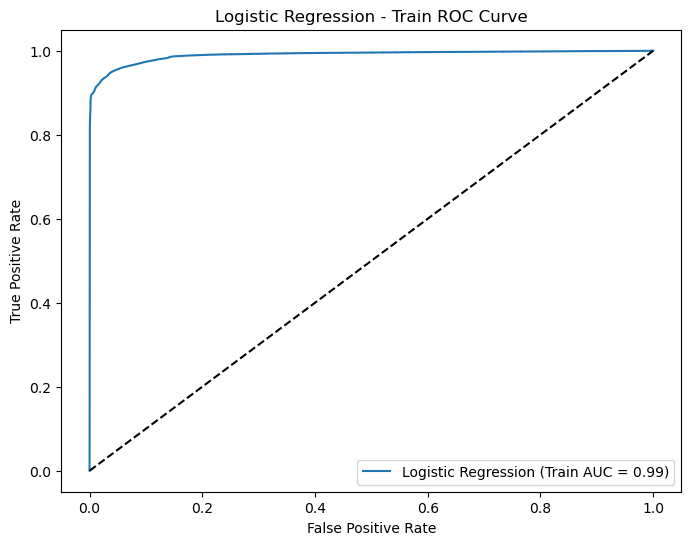


Logistic Regression - Test Data


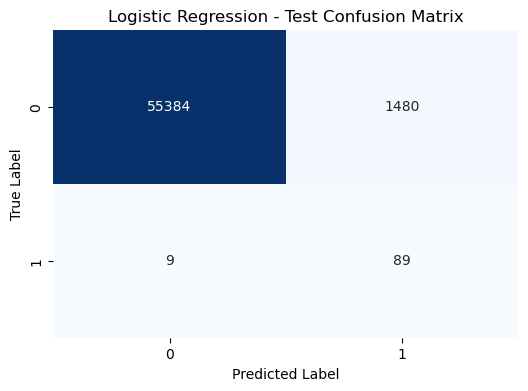

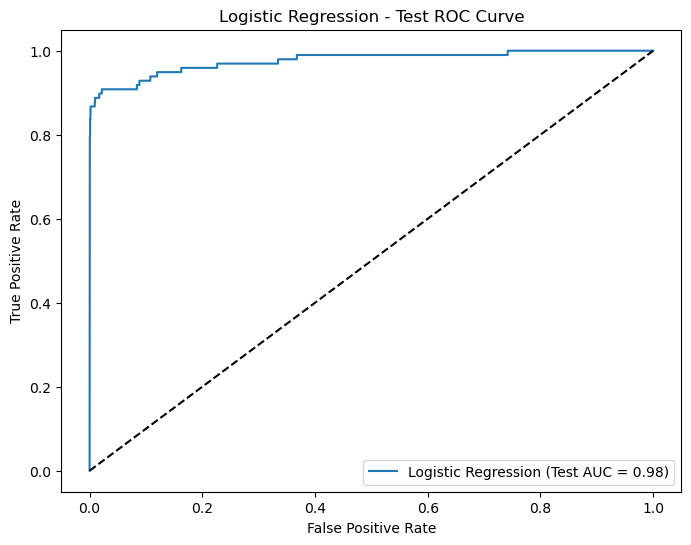


Random Forest - Train Data


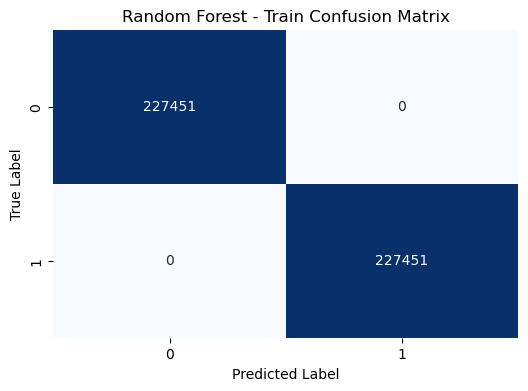

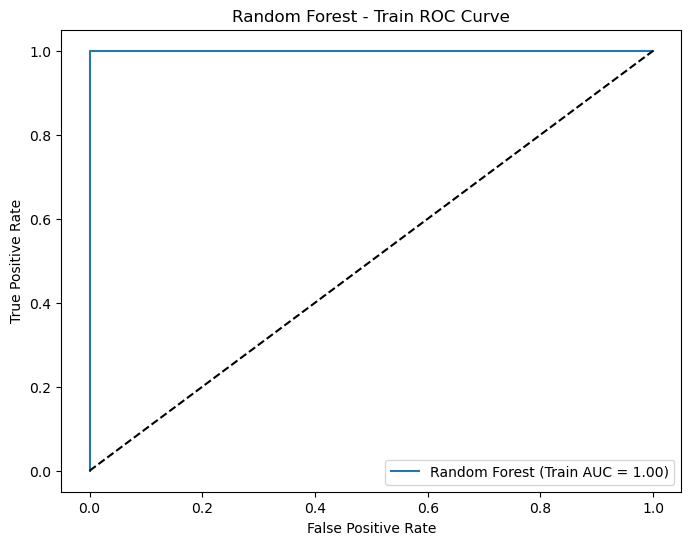


Random Forest - Test Data


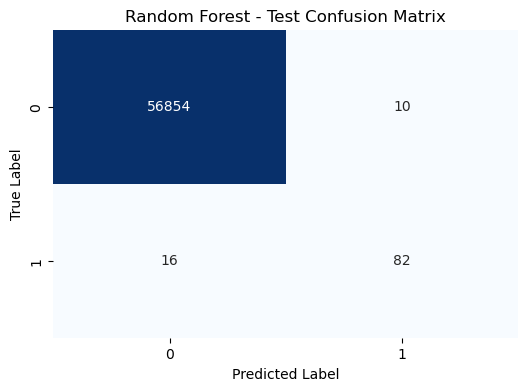

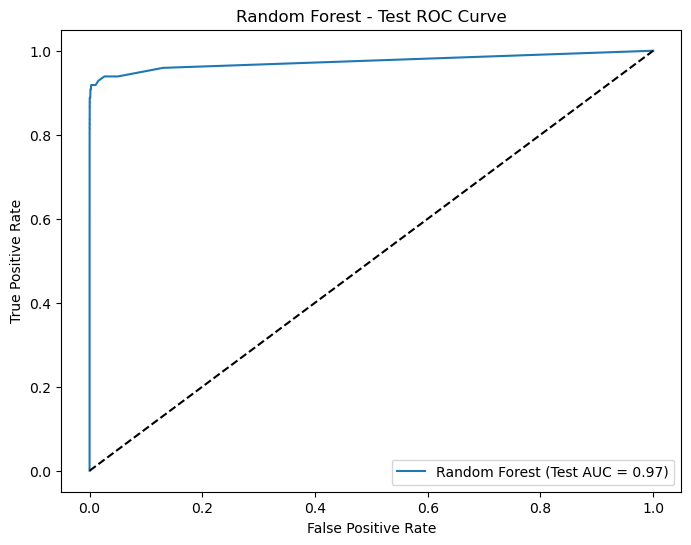


Decision Tree - Train Data


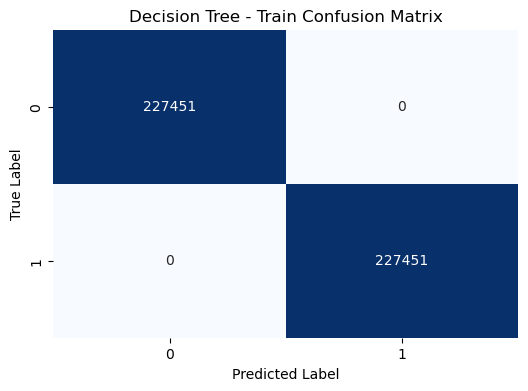

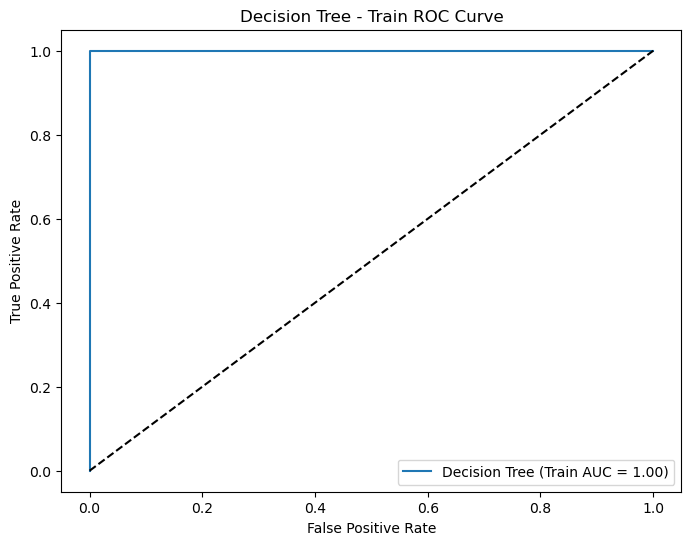


Decision Tree - Test Data


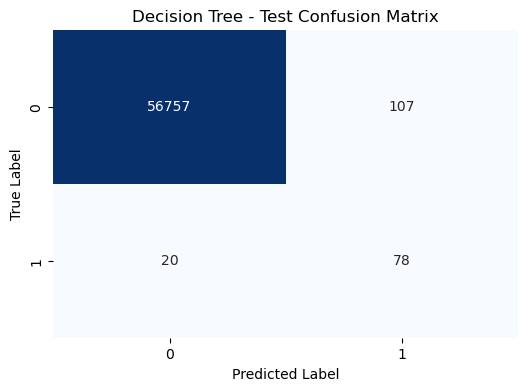

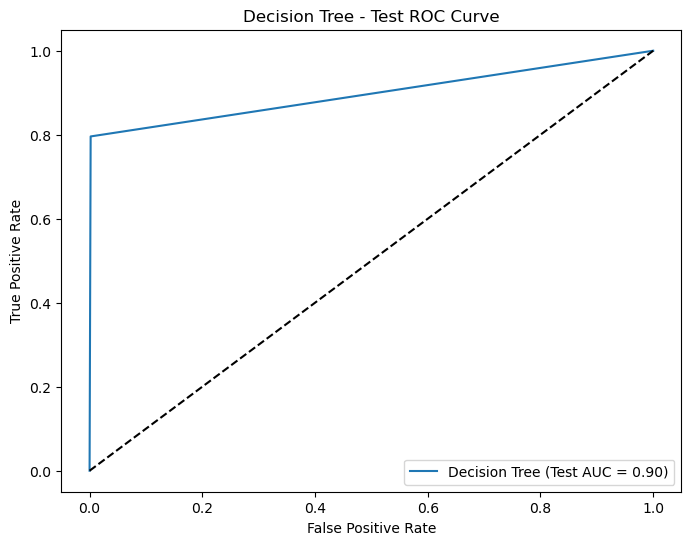

In [25]:
# Initialize the models
log_reg = LogisticRegression(max_iter=20)
rf_clf = RandomForestClassifier()
dt = DecisionTreeClassifier()  # Set probability=True for ROC calculation

# List of models to loop through
models = {'Logistic Regression': log_reg, 'Random Forest': rf_clf, 'Decision Tree': dt}

# Train and Test Confusion Matrix and ROC Curve for each model
for model_name, model in models.items():
    # Fit model on training data
    model.fit(X_train_smote, y_train_smote)
    
    # Train Predictions
    y_train_pred = model.predict(X_train_smote)
    y_train_pred_proba = model.predict_proba(X_train_smote)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Test Predictions
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Print confusion matrix and ROC for Train Data
    print(f"\n{model_name} - Train Data")
    
    # Train Confusion Matrix
    train_cm = confusion_matrix(y_train_smote, y_train_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Train Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Train ROC Curve
    if y_train_pred_proba is not None:
        fpr_train, tpr_train, _ = roc_curve(y_train_smote, y_train_pred_proba)
        auc_train = auc(fpr_train, tpr_train)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_train, tpr_train, label=f'{model_name} (Train AUC = {auc_train:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Train ROC Curve')
        plt.legend(loc="lower right")
        plt.show()
    
    # Print confusion matrix and ROC for Test Data
    print(f"\n{model_name} - Test Data")
    
    # Test Confusion Matrix
    test_cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Test Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # Test ROC Curve
    if y_test_pred_proba is not None:
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
        auc_test = auc(fpr_test, tpr_test)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr_test, tpr_test, label=f'{model_name} (Test AUC = {auc_test:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} - Test ROC Curve')
        plt.legend(loc="lower right")
        plt.show()

In [26]:
from sklearn.metrics import classification_report

# Print classification report for each model test data
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))

print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.84      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.43      0.81      0.56        98

    accuracy                           1.00     569

# Save the dataset with scaled Amount and Time columns
temp_data.to_csv('creditcard_scaled.csv', index=False)
print("Dataset saved as 'creditcard_scaled.csv'")

In [31]:
#pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pickle

# Save each model to disk
with open('log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
with open('dt_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

In [30]:
from flask import Flask, request, jsonify
import pickle
import numpy as np

# Initialize Flask app
app = Flask(__name__)

# Load models
with open('log_reg_model.pkl', 'rb') as file:
    log_reg = pickle.load(file)
with open('rf_model.pkl', 'rb') as file:
    rf = pickle.load(file)
with open('dt_model.pkl', 'rb') as file:
    dt = pickle.load(file)

# Endpoint for predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json['data']
    data = np.array(data).reshape(1, -1)

    # Choose a model to predict (e.g., using Random Forest)
    prediction = rf.predict(data)[0]
    prediction_proba = rf.predict_proba(data)[0].tolist()

    # Return prediction and probability as JSON
    return jsonify({
        'prediction': int(prediction),
        'prediction_proba': prediction_proba
    })

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [31]:
#pip install gunicorn

   ---------------------------------------- 0.0/85.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.0 kB ? eta -:--:--
   ---- ----------------------------------- 10.2/85.0 kB ? eta -:--:--
   -------------------------------------- - 81.9/85.0 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 85.0/85.0 kB 795.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
gunicorn -w 4 -b 127.0.0.1:5000 app:app

SyntaxError: invalid syntax (201450884.py, line 1)

## Below Codes are not Important

In [22]:
from sklearn.metrics import confusion_matrix
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

In [ ]:
for model_name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    # AUC ROC
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
    
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
CM = confusion_matrix(y_test,predictions)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

In [ ]:
# Convert reports to DataFrame and save for further analysis
report_df = pd.DataFrame(model_reports).T
print(report_df)